In [ ]:
# Part 1: Preparing the Data

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path

In [2]:
# Data loading
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
# Remove the Myopic Column
new_df_myopia = df_myopia.drop(columns=["MYOPIC"])
new_df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [42]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df_myopia)

In [43]:
#List of oringal column names
new_df_myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [ ]:
# Part 2: Apply Dimensionality Reduction

In [49]:
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=10)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(scaled_data)

In [50]:
# Fetch the explained variance
pca.explained_variance_ratio_.sum()

0.9187361702915181

In [51]:
# Get the shape
myopia_pca.shape

(618, 10)

In [52]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(myopia_pca)


/Users/benjaminwynne/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [53]:
new_df_myopia["x"] = transformed_features[:,0]
new_df_myopia["y"] = transformed_features[:,1]
new_df_myopia["class"] = df_myopia["MYOPIC"]


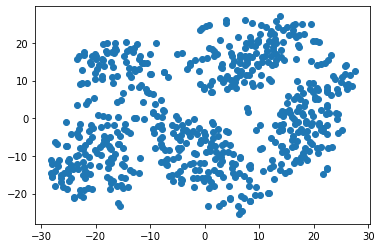

In [54]:
import matplotlib.pyplot as plt
plt.scatter(new_df_myopia["x"], new_df_myopia["y"])
plt.show()

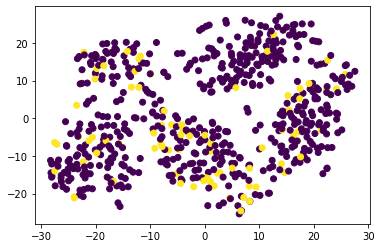

In [55]:
plt.scatter(new_df_myopia["x"], new_df_myopia["y"], c=new_df_myopia["class"])
plt.show()

In [ ]:
# Part 3: Perform a Cluster Analysis with K-means

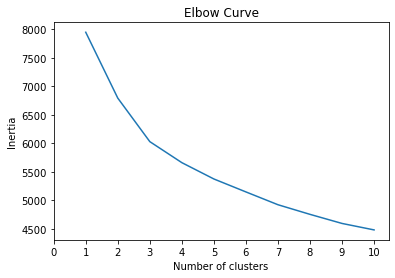

In [57]:
from sklearn.cluster import KMeans
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [63]:
# Predicting clusters with k=3

# Initialize the k-means model
#model = KMeans(n_clusters=4, random_state=0)

# Fit the model
#model.fit(myopia_pca)

# Predict clusters
#predictions = model.predict(myopia_pca)

# Add the predicted class column to the dataframe
#myopia_pca["class"] = model.labels_
#myopia_pca